In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import os
pathSpecified = os.getcwd()
listOfFileNames = os.listdir(pathSpecified)  

## Loading Dataset

In [2]:
with open (listOfFileNames[4], "r") as file:
    dicts = json.load(file)
customer_transaction_info = pd.DataFrame(dicts['data'], columns = dicts['columns'])
customer_transaction_info

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,CA-2016-138688,1465689600000,1466035200000,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,US-2015-108966,1444521600000,1445126400000,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,US-2015-108966,1444521600000,1445126400000,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1390262400000,1390435200000,Second Class,TB-21400,FUR-FU-10001889,25.2480,3,0.20,4.1028
9990,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,FUR-FU-10000747,91.9600,2,0.00,15.6332
9991,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,TEC-PH-10003645,258.5760,2,0.20,19.3932
9992,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,OFF-PA-10004041,29.6000,4,0.00,13.3200


In [3]:
with open (listOfFileNames[1], "r") as file:
    dicts = json.load(file)
    
customers_info = pd.DataFrame(dicts)
customers_info

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...
4905,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West
4906,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South
4907,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
4908,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [4]:
with open (listOfFileNames[6], "r") as file:
    dicts = json.load(file)
    
orders_returned_info = pd.DataFrame(dicts).transpose()
orders_returned_info

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [5]:
with open (listOfFileNames[0], "r") as file:
    dicts = json.load(file)
    
product_info = pd.DataFrame(dicts['data'])
product_info.drop(columns=['index'], inplace=True)
product_info

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...
1889,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,TEC-PH-10002645,Technology,Phones,LG G2


In [6]:
with open (listOfFileNames[3], "r") as file:
    dicts = json.load(file)
    
region_seller_info = pd.DataFrame(dicts)
region_seller_info

,0,1,2,3
0,Anna Andreadi,West,Femail,45
1,Chuck Magee,East,G,43
2,Kelly Williams,Central,None,35
3,Cassandra Brandow,South,F,9849


## Merging all dataframe to in one dataframe

In [7]:
df = customer_transaction_info.merge(customers_info, on ='Customer ID', how= 'left')
new_df = df.merge(orders_returned_info, on='Order ID', how= 'left')
final_df = new_df.merge(product_info, on = 'Product ID', how= 'left')
final_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,...,Segment,Country,City,State,Postal Code,Region,Returned,Category,Sub-Category,Product Name
0,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Henderson,Kentucky,42420,South,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Houston,Texas,77070,Central,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Dallas,Texas,75217,Central,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
3,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,...,Consumer,United States,Henderson,Kentucky,42420,South,NaN,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
4,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,...,Consumer,United States,Houston,Texas,77070,Central,NaN,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


In [8]:
final_df[final_df['Product Name'].str.contains('Printer')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,...,Segment,Country,City,State,Postal Code,Region,Returned,Category,Sub-Category,Product Name
1316,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,San Antonio,Texas,78207,Central,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1317,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,New York City,New York,10024,East,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1318,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,Santa Barbara,California,93101,West,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1319,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,Des Moines,Washington,98198,West,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1694,CA-2015-169397,1450915200000,1451174400000,First Class,JB-15925,TEC-MA-10001148,479.988,4,0.7,-383.9904,...,Consumer,United States,Dublin,Ohio,43017,East,Yes,Technology,Machines,Okidata MB491 Multifunction Printer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72458,CA-2017-131303,1511827200000,1512172800000,Standard Class,EP-13915,OFF-LA-10001074,62.650,5,0.0,29.4455,...,Consumer,United States,Jonesboro,Arkansas,72401,South,NaN,Office Supplies,Labels,Round Specialty Laser Printer Labels
72459,CA-2017-131303,1511827200000,1512172800000,Standard Class,EP-13915,OFF-LA-10001074,62.650,5,0.0,29.4455,...,Consumer,United States,Los Angeles,California,90032,West,NaN,Office Supplies,Labels,Round Specialty Laser Printer Labels
72460,CA-2017-131303,1511827200000,1512172800000,Standard Class,EP-13915,OFF-LA-10001074,62.650,5,0.0,29.4455,...,Consumer,United States,San Francisco,California,94122,West,NaN,Office Supplies,Labels,Round Specialty Laser Printer Labels
72461,CA-2017-131303,1511827200000,1512172800000,Standard Class,EP-13915,OFF-LA-10001074,62.650,5,0.0,29.4455,...,Consumer,United States,San Diego,California,92037,West,NaN,Office Supplies,Labels,Round Specialty Laser Printer Labels


In [9]:
#final_df[final_df['Product Name'].str.contains('Printer') == False & (final_df['Sub-Category'] == 'Machines')]

In [10]:
final_df['Target'] = final_df['Product Name'].apply(lambda x: 1 if 'Printer' in x else 0)

In [11]:
final_df = final_df[final_df['Sub-Category'] == 'Machines']

In [12]:
final_df.drop(['Product Name'], axis=1, inplace=True)

In [13]:
final_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,...,Segment,Country,City,State,Postal Code,Region,Returned,Category,Sub-Category,Target
1316,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.992,...,Consumer,United States,San Antonio,Texas,78207,Central,NaN,Technology,Machines,1
1317,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.992,...,Consumer,United States,New York City,New York,10024,East,NaN,Technology,Machines,1
1318,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.992,...,Consumer,United States,Santa Barbara,California,93101,West,NaN,Technology,Machines,1
1319,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.992,...,Consumer,United States,Des Moines,Washington,98198,West,NaN,Technology,Machines,1
1647,CA-2015-146262,1420156800000,1420761600000,Standard Class,VW-21775,TEC-MA-10000864,1188.000,9,0.7,-950.400,...,Corporate,United States,Medina,Ohio,44256,East,Yes,Technology,Machines,0


In [14]:
# filter_df = final_df[(final_df['Product Name'].str.contains('Printer')) & (final_df['Sub-Category'] == 'Machines')]
# filter_df

# Checking Shapes of entire data

In [15]:
final_df.shape

(870, 21)

In [16]:
final_df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Postal Code,Target
count,8.700000e+02,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,1.457721e+12,1.458053e+12,1495.822074,3.800000,0.303218,71.444943,55483.921839,0.606897
std,3.566022e+10,3.563456e+10,2406.550207,2.067113,0.249674,990.493669,32280.419197,0.488720
min,1.394755e+12,1.395014e+12,11.560000,1.000000,0.000000,-6599.978000,1810.000000,0.000000
25%,1.422576e+12,1.423181e+12,336.510000,2.000000,0.100000,-77.779950,23498.500000,0.000000
50%,1.460765e+12,1.461110e+12,599.985000,3.000000,0.200000,44.868000,55078.500000,1.000000
75%,1.484957e+12,1.485475e+12,1889.980500,5.000000,0.500000,225.600000,90032.000000,1.000000
max,1.514160e+12,1.514419e+12,22638.480000,11.000000,0.700000,2799.984000,99207.000000,1.000000


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 1316 to 71183
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       870 non-null    object 
 1   Order Date     870 non-null    int64  
 2   Ship Date      870 non-null    int64  
 3   Ship Mode      870 non-null    object 
 4   Customer ID    870 non-null    object 
 5   Product ID     870 non-null    object 
 6   Sales          870 non-null    float64
 7   Quantity       870 non-null    int64  
 8   Discount       870 non-null    float64
 9   Profit         870 non-null    float64
 10  Customer Name  870 non-null    object 
 11  Segment        870 non-null    object 
 12  Country        870 non-null    object 
 13  City           870 non-null    object 
 14  State          870 non-null    object 
 15  Postal Code    870 non-null    int64  
 16  Region         870 non-null    object 
 17  Returned       98 non-null     object 
 18  Category  

# Checking missing values and missing percentage

In [18]:
missing = final_df.isnull().sum()
miss_per = (missing/df.shape[0])*100
dic = {'No. of Missing value': missing, 'Missing percentage': miss_per}
dic = pd.DataFrame(dic)
dic

,No. of Missing value,Missing percentage
Order ID,0,0.000000
Order Date,0,0.000000
Ship Date,0,0.000000
Ship Mode,0,0.000000
Customer ID,0,0.000000
Product ID,0,0.000000
Sales,0,0.000000
Quantity,0,0.000000
Discount,0,0.000000
Profit,0,0.000000


# Handling missing values

In [19]:
#final_df['Returned'] = final_df['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# EDA

# Graphical Analysis

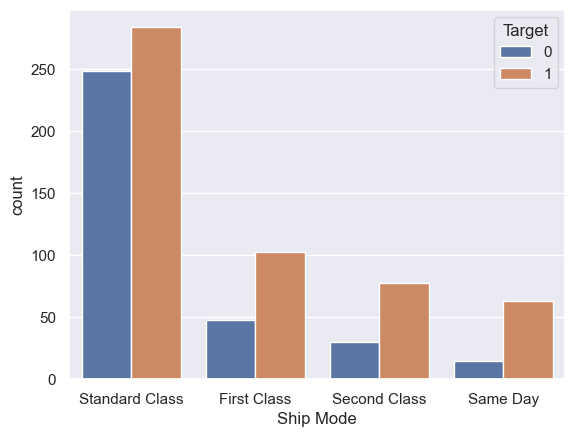

In [20]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = final_df , x = 'Ship Mode', hue ='Target')
plt.show()

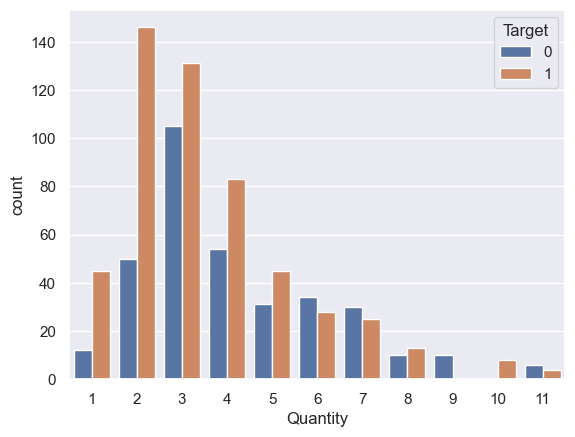

In [21]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = final_df , x = 'Quantity', hue ='Target')
plt.show()

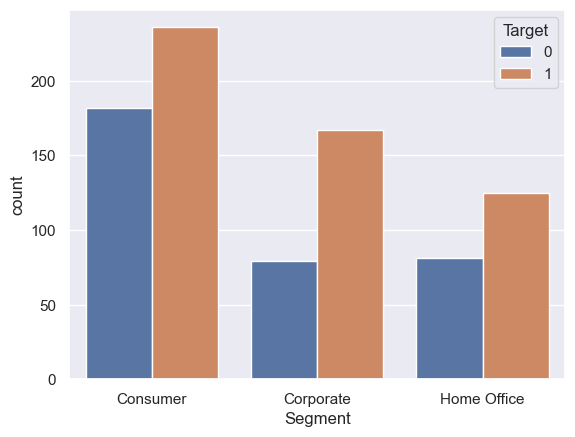

In [22]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = final_df , x = 'Segment', hue ='Target')
plt.show()

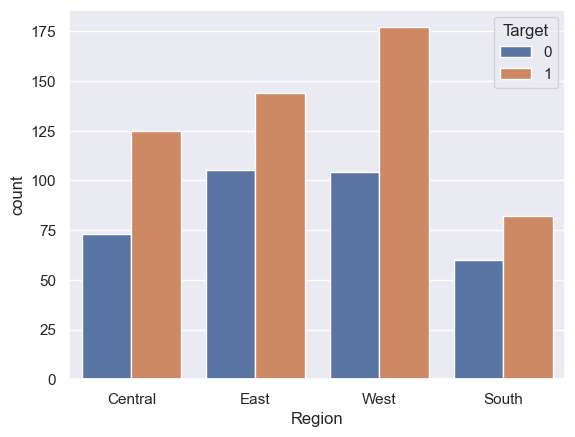

In [23]:
#plt.figure(figsize=(30, 30))
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = final_df , x = 'Region', hue ='Target')
plt.show()

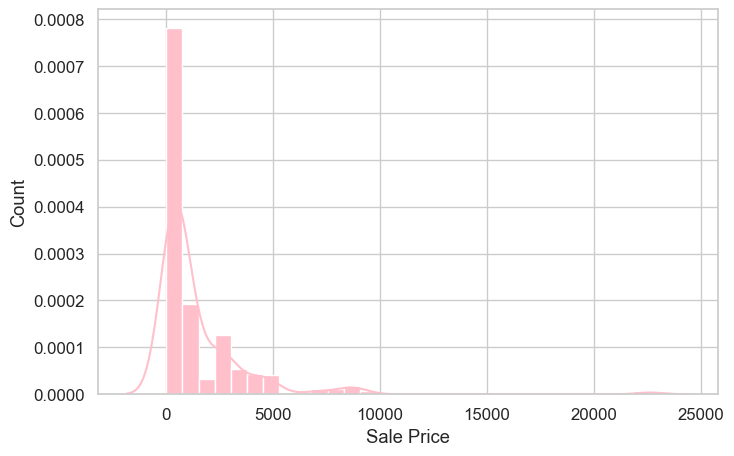

In [24]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    final_df['Sales'], norm_hist=False, kde=True, color='pink', bins=30, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [25]:
def check_data_distribution(df):
    plt.figure(figsize=(30,40))
    
    for i,col in enumerate(df):
        plt.subplot(7,3,i + 1)
        sns.histplot(df[col], kde=True, bins= 20, color='blue')
    plt.tight_layout()
    plt.show()


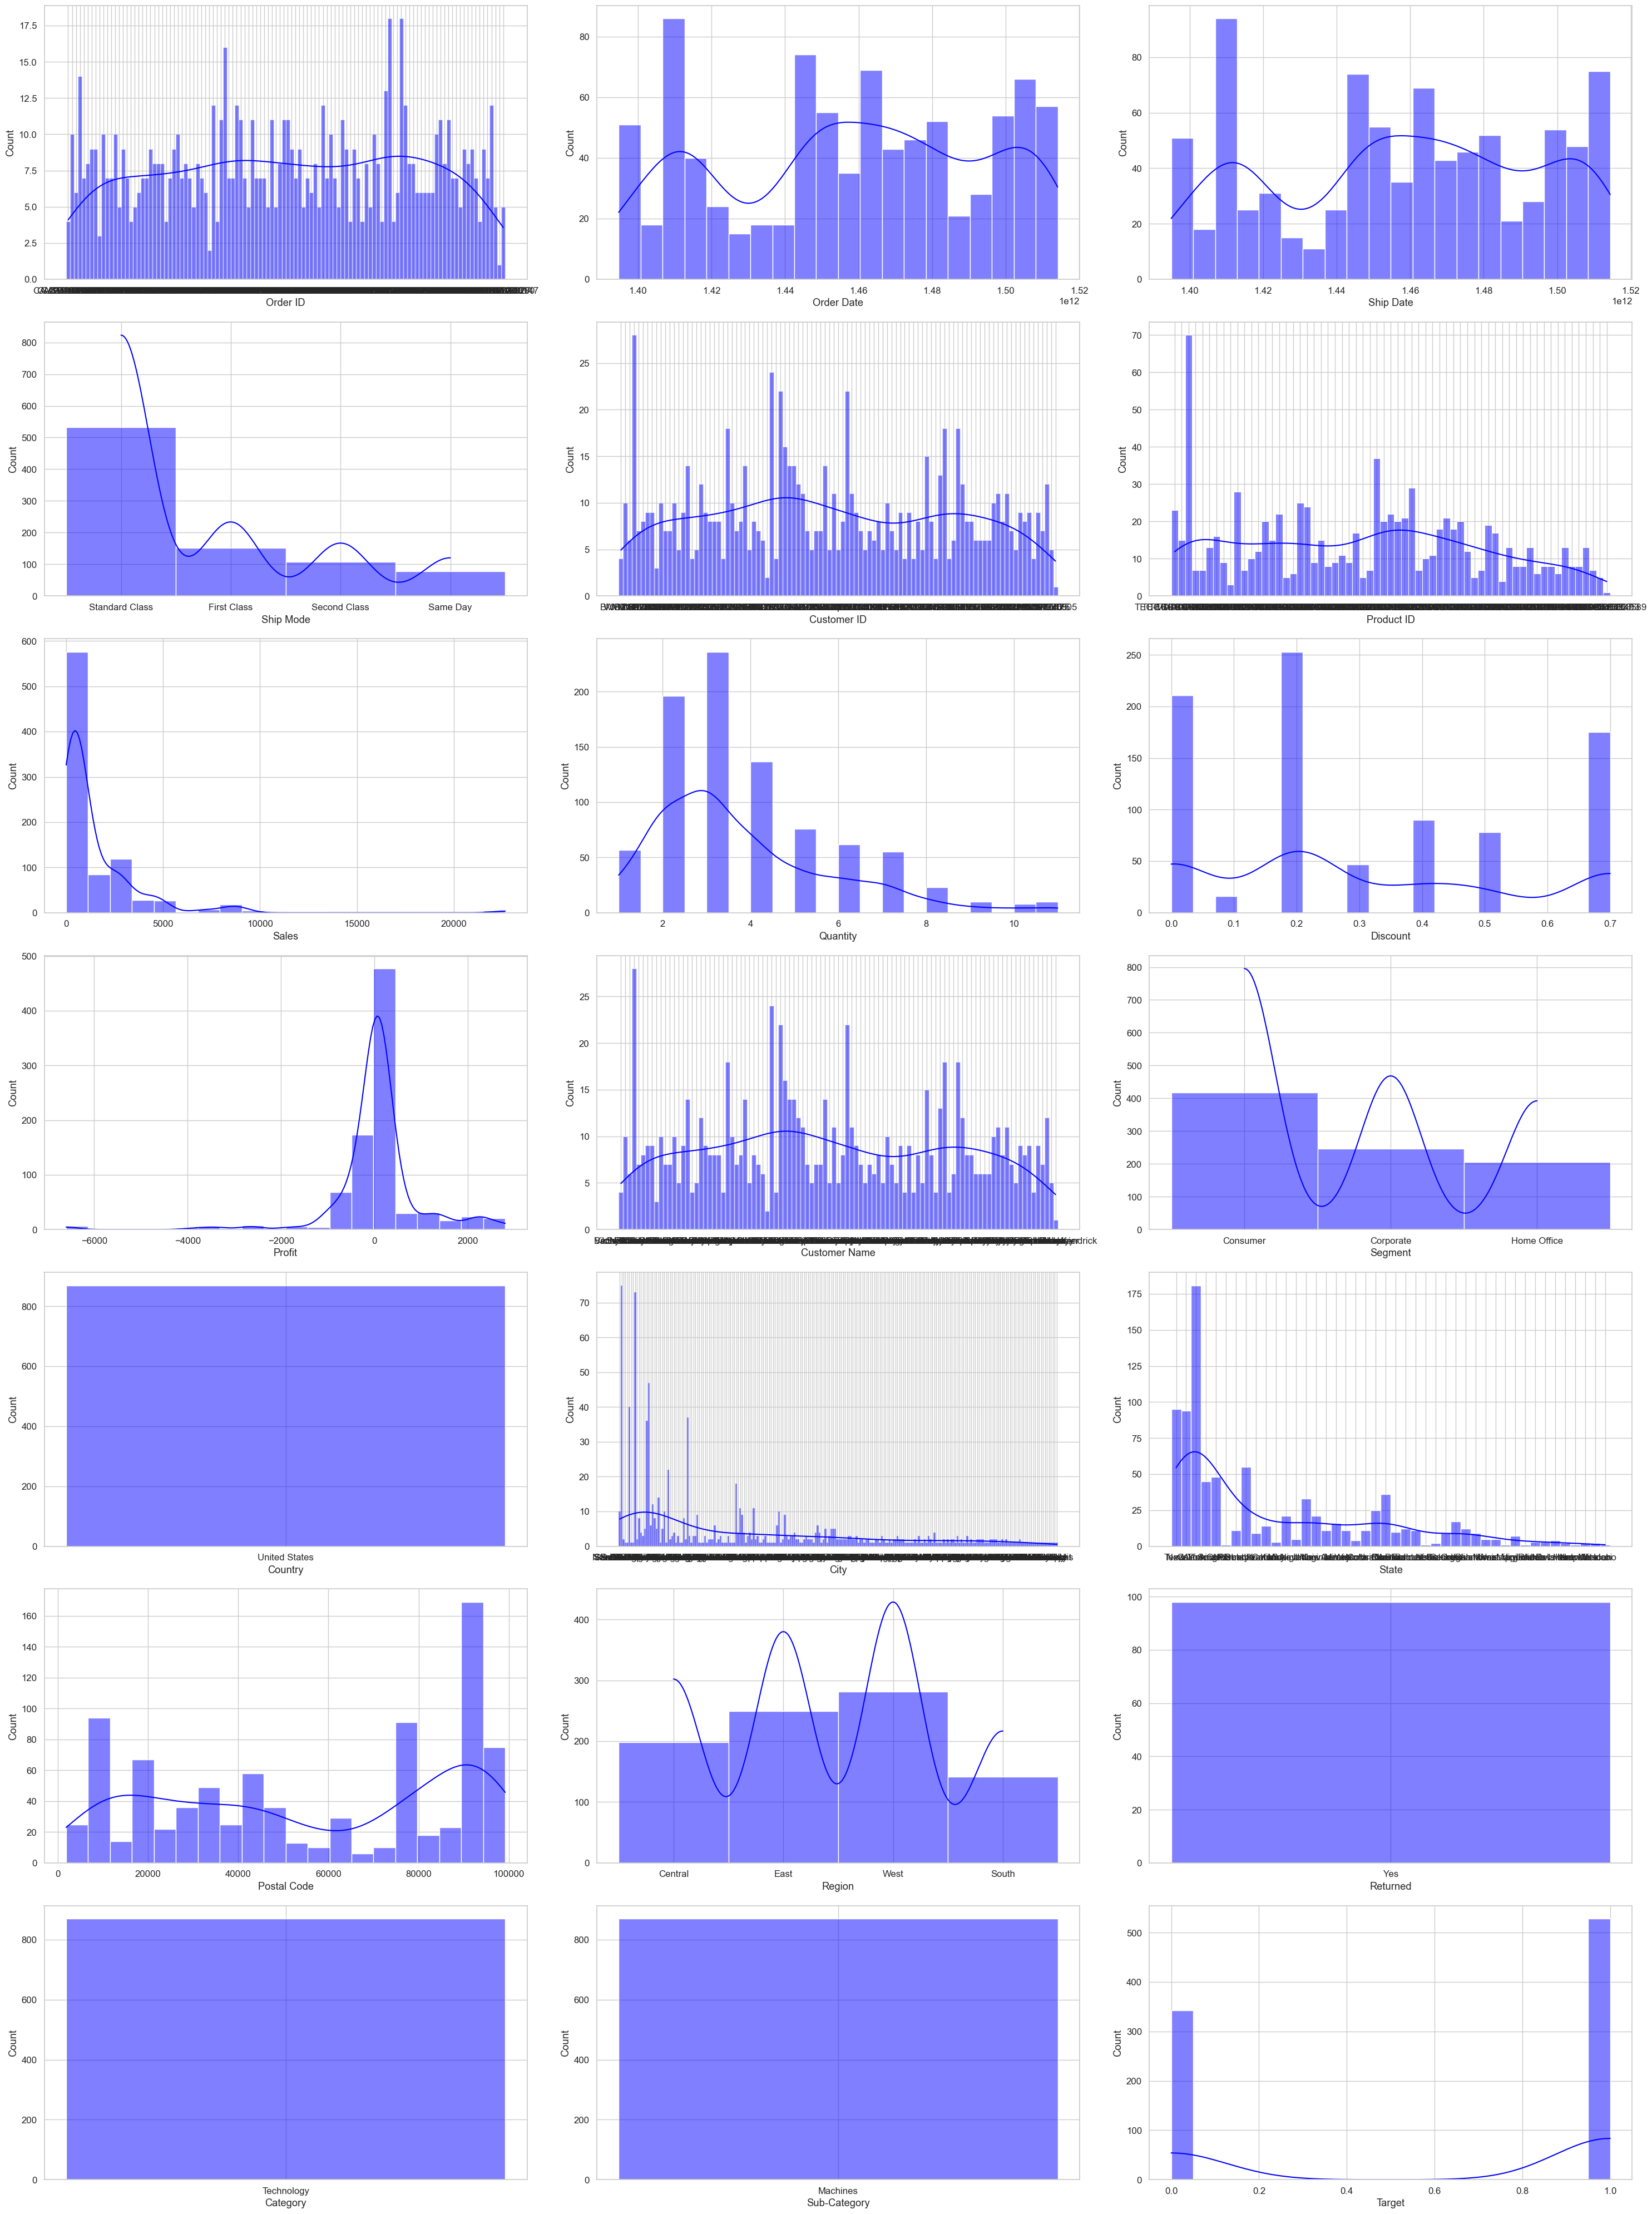

In [26]:
check_data_distribution(final_df)

# Checking Outliers

<Axes: ylabel='Sales'>

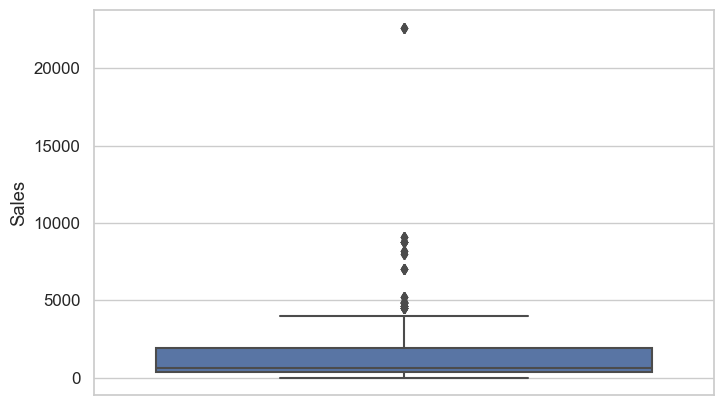

In [27]:
sns.boxplot(y='Sales', data=final_df, color='b')

<Axes: ylabel='Discount'>

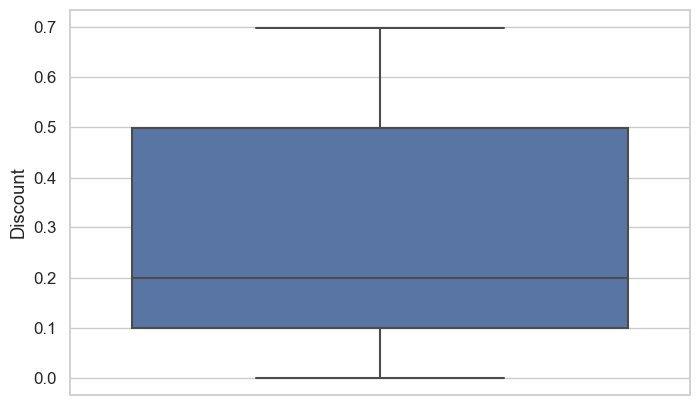

In [28]:
sns.boxplot(y='Discount', data=final_df, color='b')

<Axes: ylabel='Profit'>

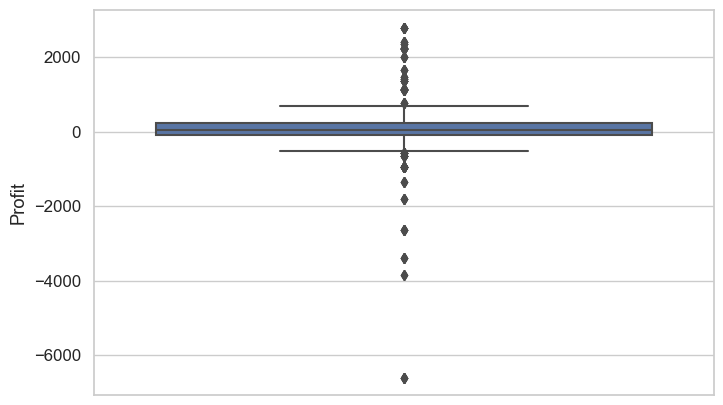

In [29]:
sns.boxplot(y='Profit', data=final_df, color='b')

# Removing Outliers

In [30]:
def handle_outlier(df, colm):
    for i in colm:
        Q1 = df[colm].quantile(0.25)
        Q3 = df[colm].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        df[df[colm] > upper_limit]
        df[df[colm] < lower_limit]
        df[colm] = np.where(
        df[colm] > upper_limit,
        upper_limit,
        np.where(
            df[colm] < lower_limit,
            lower_limit,
            df[colm]
        )
    )

In [31]:
handle_outlier(final_df, ['Sales', 'Profit'])

<Axes: ylabel='Sales'>

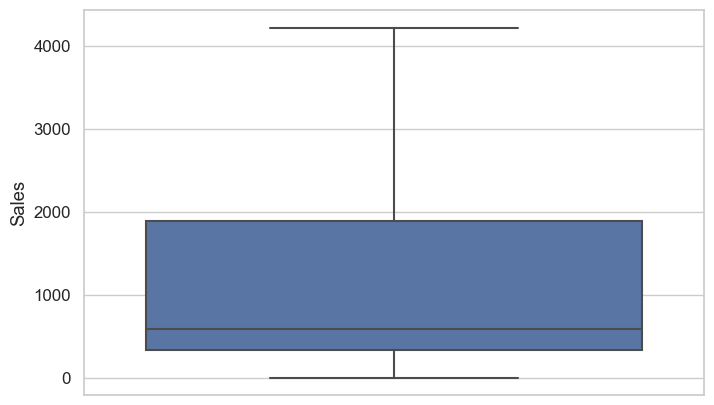

In [32]:
sns.boxplot(y='Sales', data=final_df, color='b')

<Axes: ylabel='Profit'>

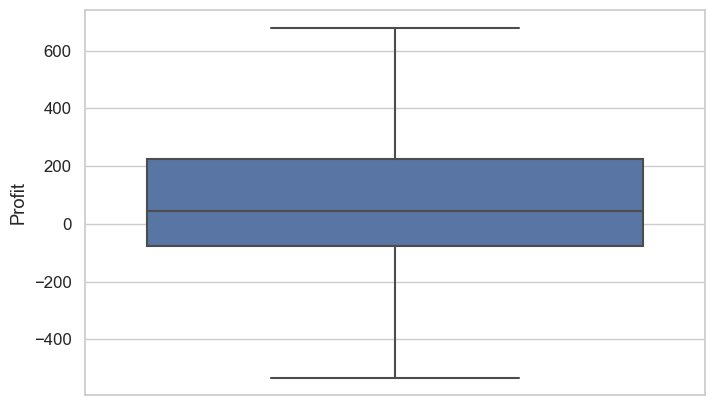

In [33]:
sns.boxplot(y='Profit', data=final_df, color='b')

## Feature Engineering

In [34]:
drop_cols = ['Order ID', 'Order Date', 'Ship Date', 'Customer ID',
                         'Product ID', 'Customer Name', 'Postal Code', 'Returned']
final_df.drop(columns= drop_cols, axis= 1, inplace= True)
#filter_df

# Transforming categorical data into numericals

In [35]:
label_encoder = LabelEncoder()

label_encoder.fit(final_df['Ship Mode'])
final_df['Ship Mode'] = label_encoder.transform(final_df['Ship Mode'])
label_encoder.fit(final_df['Segment'])
final_df['Segment'] = label_encoder.transform(final_df['Segment'])
label_encoder.fit(final_df['Region'])
final_df['Region'] = label_encoder.transform(final_df['Region'])
label_encoder.fit(final_df['Category'])
final_df['Category'] = label_encoder.transform(final_df['Category'])
label_encoder.fit(final_df['Sub-Category'])
final_df['Sub-Category'] = label_encoder.transform(final_df['Sub-Category'])
label_encoder.fit(final_df['State'])
final_df['State'] = label_encoder.transform(final_df['State'])
label_encoder.fit(final_df['City'])
final_df['City'] = label_encoder.transform(final_df['City'])
label_encoder.fit(final_df['Country'])
final_df['Country'] = label_encoder.transform(final_df['Country'])

In [36]:
final_df

,Ship Mode,Sales,Quantity,Discount,Profit,Segment,Country,City,State,Region,Category,Sub-Category,Target
1316,3,4220.18625,8,0.4,-532.849875,0,0,187,37,0,0,0,1
1317,3,4220.18625,8,0.4,-532.849875,0,0,139,27,1,0,0,1
1318,3,4220.18625,8,0.4,-532.849875,0,0,194,2,3,0,0,1
1319,3,4220.18625,8,0.4,-532.849875,0,0,48,41,3,0,0,1
1647,3,1188.00000,9,0.7,-532.849875,1,0,119,29,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71179,2,399.54000,2,0.4,-79.908000,0,0,109,2,3,0,0,0
71180,2,399.54000,2,0.4,-79.908000,0,0,158,32,1,0,0,0
71181,2,399.54000,2,0.4,-79.908000,0,0,54,37,0,0,0,0
71182,2,399.54000,2,0.4,-79.908000,0,0,4,17,1,0,0,0


# Checking correlation between numerical features

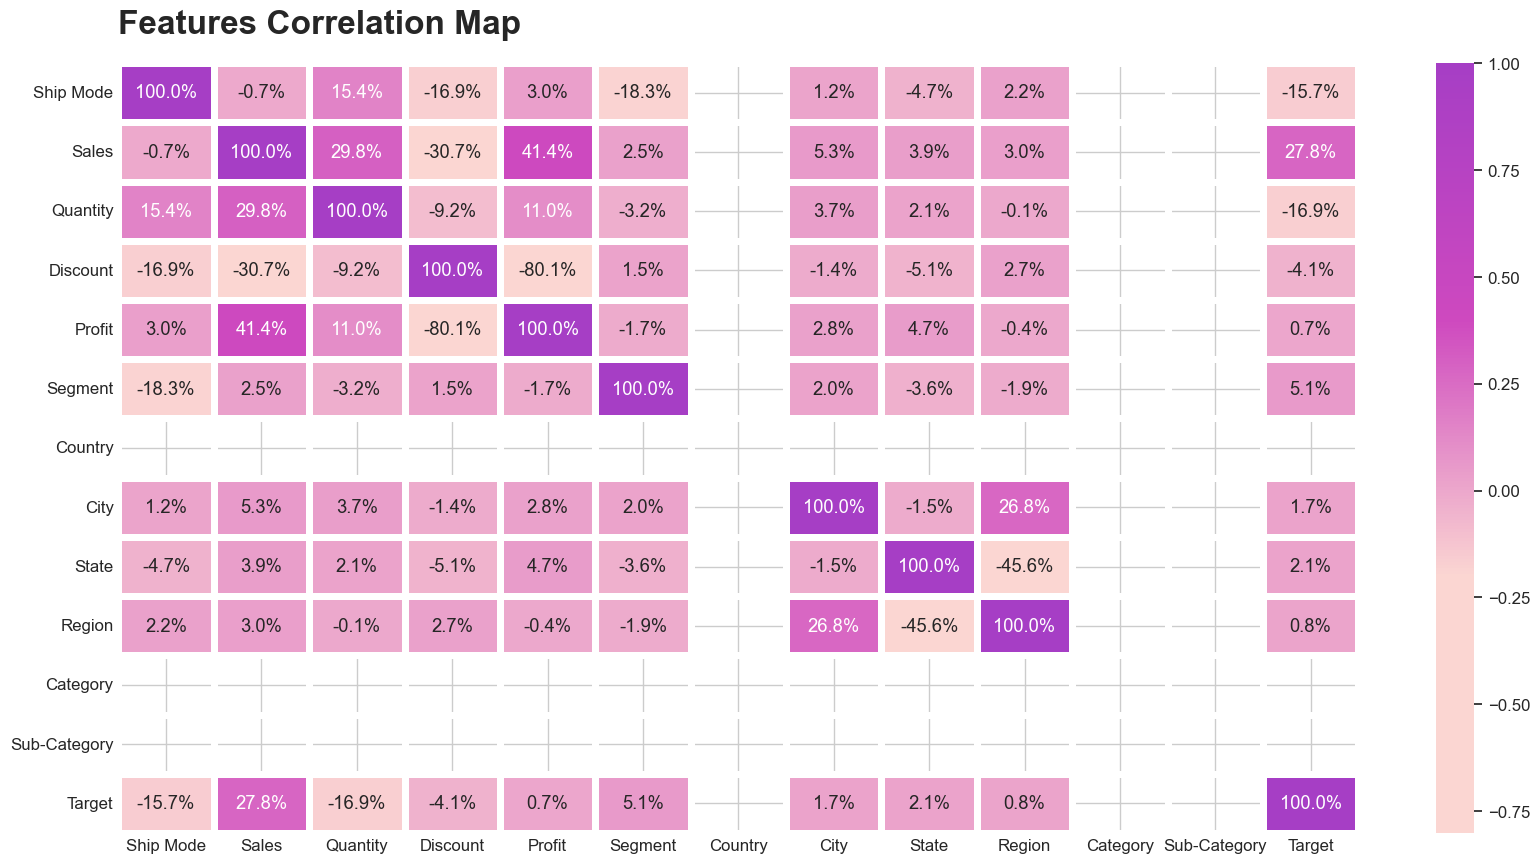

In [37]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
colors = ['#FBD6D2',"#FBD6D2", "#CE49BF","#A63EC5"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(final_df.corr(),annot=True,ax=ax,cmap=colormap,fmt='.1%',linewidth=5)
ax.tick_params(axis='both',which='both',length=0)
ax.text(0,-0.5,'Features Correlation Map',fontsize=24, fontweight='bold');
plt.show()

# Splitting the features

In [38]:
y = final_df['Target']
X = final_df.drop(['Target'], axis=1)

# Feature Selection

In [39]:
correlation_matrix = final_df.corr()

# Extract the correlation values of the target variable
target_correlation = correlation_matrix['Target']

# Print the correlation values in descending order
print(target_correlation.sort_values(ascending=False))

Target          1.000000
Sales           0.277994
Segment         0.051244
State           0.020906
City            0.017319
Region          0.007936
Profit          0.007114
Discount       -0.041489
Ship Mode      -0.156780
Quantity       -0.169040
Country              NaN
Category             NaN
Sub-Category         NaN
Name: Target, dtype: float64


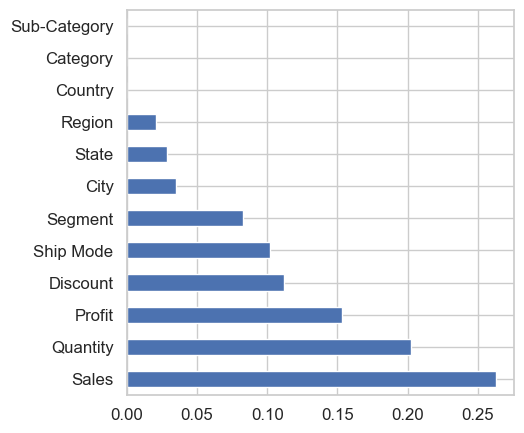

In [40]:
model = ExtraTreesClassifier()
model.fit(X, y)
plt.figure(figsize=(5,5))
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

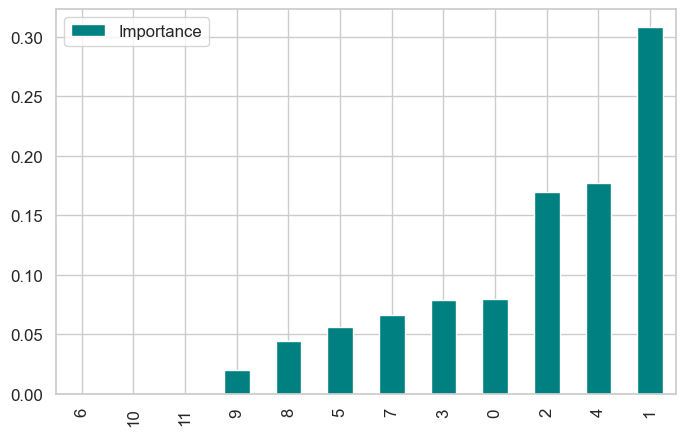

In [41]:
model = RandomForestClassifier(n_estimators= 400)
model.fit(X, y)
feat_importance = model.feature_importances_
final_df = pd.DataFrame({'features': pd.DataFrame(X).columns, 'Importance': feat_importance})
final_df.set_index('Importance')
final_df = final_df.sort_values('Importance')
final_df.plot.bar(color='teal')
plt.show()

# Training the Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Transforming the data using StandardScaler

In [43]:
sc = StandardScaler()
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Cross Validation using KFold CV

In [44]:
KFold_cv = KFold(n_splits= 5, shuffle= True)

# Building Models

Logistic Regression Model
Training accuracy: 0.7413793103448276
Test accuracy: 0.7241379310344828
cross_val_score: [0.70714286 0.74100719 0.74100719 0.70503597 0.75539568]
classification_report:               precision    recall  f1-score   support

           0       0.71      0.53      0.61       264
           1       0.75      0.87      0.81       432

    accuracy                           0.74       696
   macro avg       0.73      0.70      0.71       696
weighted avg       0.74      0.74      0.73       696




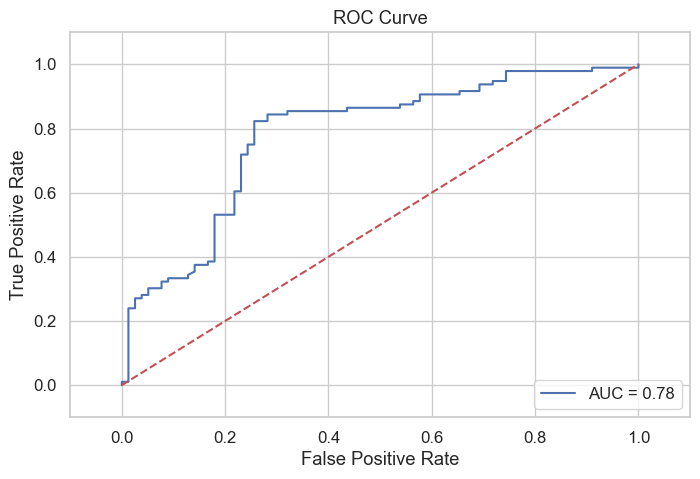

In [45]:
logistic_model = LogisticRegression(C= 0.23357214690901212, max_iter= 100, penalty= 'l2', solver= 'lbfgs')
logistic_model.fit(X_train_transformed, y_train)
scores = cross_val_score(logistic_model, X_train_transformed, y_train, cv= KFold_cv)
train_predictions = logistic_model.predict(X_train_transformed)
test_predictions = logistic_model.predict(X_test_transformed)
classifi_report = classification_report(y_train, train_predictions)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Logistic Regression Model')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()

y_preds = logistic_model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

RandomForestClassifier
Training accuracy: 0.9640804597701149
Test accuracy: 0.9252873563218391
cross_val_score: [0.92142857 0.90647482 0.92086331 0.89928058 0.87769784]
classification_report:               precision    recall  f1-score   support

           0       0.71      0.53      0.61       264
           1       0.75      0.87      0.81       432

    accuracy                           0.74       696
   macro avg       0.73      0.70      0.71       696
weighted avg       0.74      0.74      0.73       696




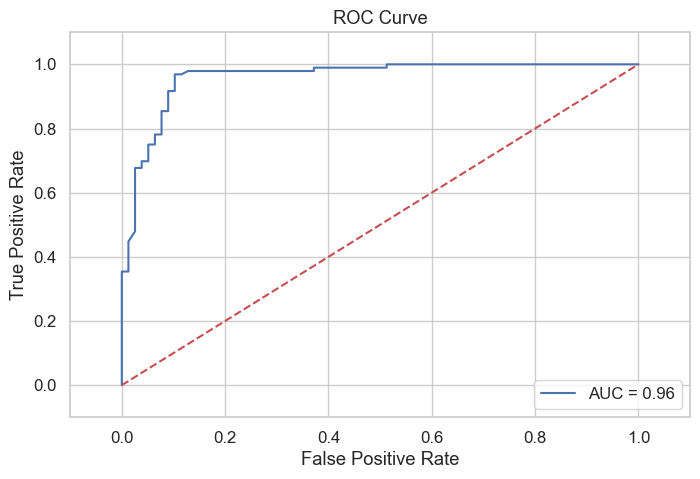

In [46]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
scores = cross_val_score(model, X_train_transformed, y_train, cv=KFold_cv)
classifi_report = classification_report(y_train, train_predictions)
train_predictions = model.predict(X_train_transformed)
test_predictions = model.predict(X_test_transformed)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print('RandomForestClassifier')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()

y_preds = model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

XGBClassifier
Training accuracy: 0.9612068965517241
Test accuracy: 0.9252873563218391
cross_val_score: [0.92142857 0.90647482 0.92086331 0.89928058 0.87769784]
classification_report:               precision    recall  f1-score   support

           0       0.98      0.92      0.95       264
           1       0.95      0.99      0.97       432

    accuracy                           0.96       696
   macro avg       0.96      0.95      0.96       696
weighted avg       0.96      0.96      0.96       696




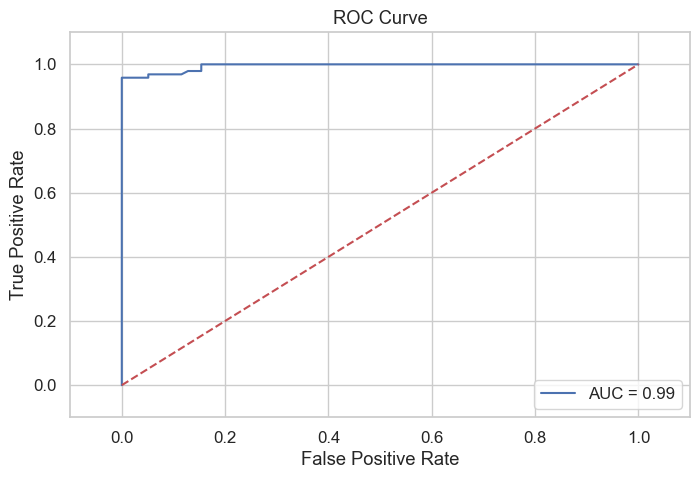

In [47]:
Xgb_model = XGBClassifier(base_score= 0.2, booster= 'gbtree', gamma= 1, learning_rate= 0.01, n_estimators= 500, 
                          reg_alpha= 1, reg_lambda= 0.5)
Xgb_model.fit(X_train_transformed, y_train)
# make predictions for test data
score = cross_val_score(Xgb_model, X_train_transformed, y_train, cv= KFold_cv)
train_predictions = Xgb_model.predict(X_train_transformed)
test_predictions = Xgb_model.predict(X_test_transformed)
classifi_report = classification_report(y_train, train_predictions)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print('XGBClassifier')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()



y_preds = Xgb_model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [48]:
logistic_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'C' : np.logspace(-4, 4, 20),
                        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                        'max_iter' : [100, 1000,2500, 5000]}

In [49]:
RandomForestparam_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [4,10,20,50,None]
}

In [50]:
Xgbparams = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}


In [51]:
# Rangrid_cv = GridSearchCV(RandomForestClassifier(n_jobs=-1), RandomForestparam_grid, n_jobs=-1, cv=KFold_cv, scoring='roc_auc')
# Rangrid_cv.fit(X_train, y_train)
# print('Best score:', Rangrid_cv.best_score_)
# print('Best params:', Rangrid_cv.best_params_)

In [52]:
# print('Best score:', Rangrid_cv.best_score_)
# print('Best params:', Rangrid_cv.best_params_)

In [53]:
# Loggrid_cv = GridSearchCV(LogisticRegression(n_jobs=-1), logistic_param_grid, n_jobs=-1, cv=KFold_cv, scoring='roc_auc')
# Loggrid_cv.fit(X_train_transformed, y_train)
# print('Best score:', Loggrid_cv.best_score_)
# print('Best params:', Loggrid_cv.best_params_)

# Plotting ROC and AUC curve to find out best model among of them.

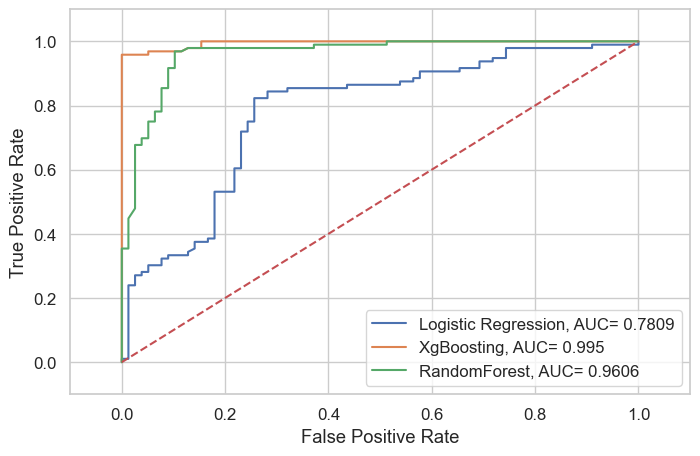

In [54]:
y_pred = logistic_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC= "+str(auc))

y_preds = Xgb_model.predict_proba(X_test_transformed)[:, 1]
fprs, tprs, __ = roc_curve(y_test, y_preds)
aucs = round(roc_auc_score(y_test, y_preds), 4)
plt.plot(fprs,tprs,label="XgBoosting, AUC= "+str(aucs))

y_preds_ = model.predict_proba(X_test_transformed)[:, 1]
fprs_, tprs_, _ = roc_curve(y_test, y_preds_)
aucs_ = round(roc_auc_score(y_test, y_preds_), 4)
plt.plot(fprs_,tprs_,label="RandomForest, AUC= "+str(aucs_))

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()